<h1 dir=rtl align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌بینی مصرف برق</font>
</h1>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این سوال قصد داریم با استفاده از یک مجموعه‌داده که شامل اطلاعات منازل است، میزان مصرف برق ماهانه آن را پیش‌بینی کنیم. برای این‌کار شما باید پس از پیش‌پردازش داده‌ها، به مهندسی ویژگی و ساخت مدل مناسب بپردازید. توجه داشته باشید، در انتها، تنها مدل شما مورد بررسی قرار خواهد گرفت، اما مسلماً هرچه پیش‌پردازش و مهندسی ویژگی بهتری داشته باشید در نهایت به مدل بهتری خواهید رسید.

</font>
</p>

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در فایل اولیه‌ی این سوال یک پوشه با نام <code>data</code> قرار دارد.
    این پوشه شامل دو فایل با نام‌های <code>train.csv</code> و <code>test.csv</code> است که به‌ترتیب مجموعه‌داده‌ی آموزش و آزمون هستند.
    مجموعه‌داده‌ی آموزش این سوال شامل ۹۶۴ سطر و ۶ ستون است و
        مجموعه‌داده‌ی آزمون دارای ۵۲۴ سطر است و تنها ستون <code>electricity_consumption_kWh</code> را که ویژگی هدف است، ندارد.
    توضیحات مربوط به ستون‌ها به شرح زیر است:
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <b>نام ویژگی</b> | <b>توضیح ویژگی</b> |
| :---: | :---: |
| <code>house_size_m2</code> | متراژ خانه (مترمربع)|
| <code>num_residents</code> | تعداد ساکنان خانه|
| <code>avg_daily_temp</code> | میانگین دمای روزانه (درجه سلسیوس)|
| <code>heating_cooling</code> |استفاده از وسایل گرمایشی یا سرمایشی (0 = نه، 1 = بله)|
| <code>high_power_appliances</code> |تعداد وسایل برقی پرمصرف (مثل کولر، ماشین لباسشویی، ظرفشویی)|
| <code>electricity_consumption_kWh</code> | میزان مصرف برق ماهانه (کیلووات ساعت)|

</font>

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانید. نمونه‌های آموزشی در فایل <code>train.csv</code> و نمونه‌های آزمون که باید مقدار متغیر هدف آن‌ها را پیش‌بینی کنید در فایل <code>test.csv</code> ذخیره شده‌اند. اگر لازم دانستید می‌توانید به دلخواه خود بخشی از مجموعه‌ی آموزش را به عنوان مجموعه‌ی اعتبارسنجی نیز جدا کنید.
</font>
</p>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import xgboost

import math
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

from sklearn import tree
from sklearn.tree import plot_tree as plot_tree

from sklearn.model_selection import train_test_split 

In [11]:
# Reading/Loading the dataset files
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
train.dropna()
y = train["electricity_consumption_kWh"].to_numpy()
train = train.drop("electricity_consumption_kWh" , axis = 1)
x_test = test.to_numpy()
x_train, x_valid, y_train, y_valid = train_test_split(train, y, test_size=0.2, random_state=42)

x_train = x_train.to_numpy()
x_valid = x_valid.to_numpy()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_val_scaled = scaler.transform(x_valid)
test_scaled = scaler.transform(test_data)

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
        در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی دلخواهتان، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.

</font>
</p>

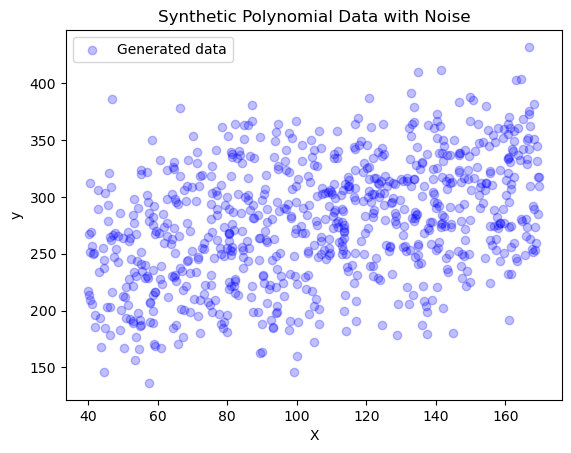

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آموزش مدل
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    حال که داده را پاکسازی کرده و احتمالا ویژگی‌هایی را به آن افزوده یا از آن حذف کرده‌اید، وقت آن است که مدلی آموزش دهید که بتواند متغیر هدف این مسئله را پیش‌بینی کند.
</font>
</p>

In [3]:

xgb_model = XGBClassifier(subsample=1.0, reg_lambda=0.4, reg_alpha=0.1, n_estimators=300, min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.4, 
                          colsample_bytree=0.9, random_state=42, eval_metric='logloss')

rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_leaf_nodes=20, max_features=None, max_depth=6, criterion='gini', 
                                  class_weight=None, bootstrap=True, random_state=42)
log_model = LogisticRegression(max_iter = 1000)

xgb_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
log_model.fit(X_train_scaled, y_train)

NameError: name 'XGBClassifier' is not defined

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    معیاری که برای ارزیابی عملکرد مدل انتخاب کرده‌ایم، <code>r2_score</code> نام دارد.
    <br>
    این معیار، سنجه ارزیابی کیفیت مدل شماست. به عبارت بهتر در سامانه داوری هم از همین معیار برای نمره‌دهی استفاده شده است.
    <br>
    پیشنهاد می‌شود با توجه به این معیار، عملکرد مدل خود را بر روی مجموعه‌ی آموزش یا اعتبارسنجی ارزیابی کنید.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
    برای دریافت نمره از این سوال لازم است تا دقت مدل شما از آستانه‌ی ۰.۶ بیشتر باشد.
    در صورتی که دقت مدل شما از ۰.۶ کمتر باشد نمره شما 
    <b>صفر</b>
    خواهد شد:
</font>
</p>


In [10]:
# evaluate your model
from sklearn.metrics import r2_score

r2_score(y_valid , y_guess)

0.7470404399584165

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی بر روی داده‌ی تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    پیش‌بینی مدل خود بر روی داده‌های آزمون را در یک دیتافریم (<code>dataframe</code>) به فرمت زیر ذخیره کنید.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    توجه داشته باشید که نام دیتافریم باید <code>submission</code> باشد؛ در غیر این‌صورت، سامانه‌ی داوری قادر به ارزیابی خروجی شما نخواهد بود.
    این دیتافریم تنها شامل ۱ ستون با اسم <code>electricity_consumption_kWh</code> است و ۵۲۴ سطر دارد.
    <br>
    به ازای هر سطر موجود در مجموعه‌داده‌ی آزمون، باید یک مقدار پیش‌بینی‌شده داشته باشید.
    به‌عنوان مثال جدول زیر، ۵ سطر ابتدایی دیتافریم <code>submission</code> را نشان می‌دهد. البته این اعداد به‌صورت فرضی هستند و در جواب شما، اعداد ستون <code>electricity_consumption_kWh</code> ممکن است متفاوت باشند.
</font>
</p>

<center>
<div style="direction: ltr;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
||<code>GPA</code>|
|:----:|:-----:|
|0|302.23|
|1|348.56|
|2|220.1|
|3|312.043|
|4|323.06|

</font>
</div>
</center>

In [14]:
predict = model.predict(x_test)
submission = pd.DataFrame(predict , columns=['electricity_consumption_kWh'])
submission

,electricity_consumption_kWh
0,314.600939
1,251.288939
2,366.569729
3,250.990576
4,323.699861
...,...
519,238.359553
520,306.142854
521,286.233829
522,313.323476


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) در غیر این صورت، در پایان مسابقه نمره شما به صفر تغییر خواهد کرد.
    <br>
    همچنین اگر از کولب برای اجرای این فایل نوت‌بوک استفاده می‌کنید، قبل از ارسال فایل <code>result.zip</code>، آخرین نسخه‌ی نوت‌بوک خود را دانلود کرده و داخل فایل ارسالی قرار دهید.
</font>

In [15]:
import zipfile
import os

if not os.path.exists(os.path.join(os.getcwd(), 'electricity_consumption.ipynb')):
    %notebook -e electricity_consumption.ipynb

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)

file_names = ['electricity_consumption.ipynb', 'submission.csv']
compress(file_names)

File Paths:
['electricity_consumption.ipynb', 'submission.csv']
